In [1]:
# pytorch
import torch

## Getting information about Tensor اطلاعات در مورد تنسور

- **shape** - چه شکل / ابعادی داره تنسور
- **dtype** - نوع اطلاعات در تنسور چی هست
- **device** - اطلاعات روی چه دستگاهی ذخیره شده GPU / 

In [2]:
# Create a tensor
some_tensor = torch.rand(3, 4)

# Find out details about it
print(some_tensor)
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Device tensor is stored on: {some_tensor.device}") # will default to CPU

tensor([[0.1570, 0.6094, 0.6433, 0.2293],
        [0.3329, 0.2511, 0.3633, 0.1050],
        [0.4467, 0.0511, 0.2984, 0.4803]])
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


**Debuging note:**

- what shape are my tensors?
- what datatype are they?
- where are they stored? 

## Manipulating tensors (tensor operations)
## تغییر تنسورها

In deep learning, data (images, text, video, audio, protein structures, etc) gets represented as tensors.

A model learns by investigating those tensors and performing a series of operations (could be 1,000,000s+) on tensors to create a representation of the patterns in the input data.

These operations are often a wonderful dance between:

- Addition
- Substraction
- Multiplication (element-wise)
- Division
- Matrix multiplication

## Basic operations

### 1.Addition

In [3]:
# Create a tensor of values and add a number to it
tensor = torch.tensor([1, 2, 3])
tensor + 10

tensor([11, 12, 13])

### 2.Substraction

In [4]:
# Subtract and reassign
tensor = tensor - 3
tensor

tensor([-2, -1,  0])

### 3.Multiplication

In [5]:
# Multiply it by 10
tensor * 10

tensor([-20, -10,   0])

In [6]:
# Tensors don't change unless reassigned
tensor

tensor([-2, -1,  0])

In [7]:
# Can also use torch functions
torch.multiply(tensor, 10)

tensor([-20, -10,   0])

In [8]:
# Can also use torch functions
torch.add(tensor, 10)

tensor([ 8,  9, 10])

## Matrix multiplication ضرب ماتریس ها، اصول پایه هوش مصنوعی

One of the most common operations in machine learning and deep learning algorithms (like neural networks) is [matrix multiplication](https://www.mathsisfun.com/algebra/matrix-multiplying.html).

![visual demo of matrix multiplication](https://github.com/aidinism/deep-learning/raw/main/images/03-matrix-multiply.gif)

[matrixmultiplication](http://matrixmultiplication.xyz/)

PyTorch implements matrix multiplication functionality in the [`torch.matmul()`](https://pytorch.org/docs/stable/generated/torch.matmul.html) method.

The main two rules for matrix multiplication to remember are:
1. The **inner dimensions** must match:
  * `(3, 2) @ (3, 2)` won't work
  * `(2, 3) @ (3, 2)` will work
  * `(3, 2) @ (2, 3)` will work
2. The resulting matrix has the shape of the **outer dimensions**:
 * `(2, 3) @ (3, 2)` -> `(2, 2)`
 * `(3, 2) @ (2, 3)` -> `(3, 3)`

> **Note:** "`@`" in Python is the symbol for matrix multiplication.

> **Resource:** You can see all of the rules for matrix multiplication using `torch.matmul()` [in the PyTorch documentation](https://pytorch.org/docs/stable/generated/torch.matmul.html).


In [9]:
import torch
tensor = torch.tensor([1, 2, 3])
tensor.shape


torch.Size([3])

The difference between element-wise multiplication and matrix multiplication is the addition of values.

For our `tensor` variable with values `[1, 2, 3]`:

| Operation | Calculation | Code |
| ----- | ----- | ----- |
| **Element-wise multiplication** | `[1*1, 2*2, 3*3]` = `[1, 4, 9]` | `tensor * tensor` |
| **Matrix multiplication** | `[1*1 + 2*2 + 3*3]` = `[14]` | `tensor.matmul(tensor)` |


In [10]:
tensor

tensor([1, 2, 3])

In [11]:
# Element-wise matrix multiplication
tensor * tensor

tensor([1, 4, 9])

In [12]:
# Matrix multiplication
torch.matmul(tensor, tensor)

tensor(14)

In [13]:
# Can also use the "@" symbol for matrix multiplication, (not recommended)
tensor @ tensor

tensor(14)

You can do matrix multiplication by hand but it's not recommended.

The in-built `torch.matmul()` method is faster.

In [14]:
%%time
# Matrix multiplication by hand 
# (avoid doing operations with for loops at all cost, they are computationally expensive)
value = 0
for i in range(len(tensor)):
  value += tensor[i] * tensor[i]
value

CPU times: user 505 µs, sys: 234 µs, total: 739 µs
Wall time: 1.06 ms


tensor(14)

In [17]:
%%time
torch.matmul(tensor, tensor)

CPU times: user 53 µs, sys: 22 µs, total: 75 µs
Wall time: 76.3 µs


tensor(14)

## One of the most common errors in deep learning (shape errors)

Because much of deep learning is multiplying and performing operations on matrices and matrices have a strict rule about what shapes and sizes can be combined, one of the most common errors you'll run into in deep learning is shape mismatches.

In [18]:
# Shapes need to be in the right way  
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10],
                         [8, 11], 
                         [9, 12]], dtype=torch.float32)

torch.matmul(tensor_A, tensor_B) # (this will error)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

## torch.transpose  ترانهاده ماتریس

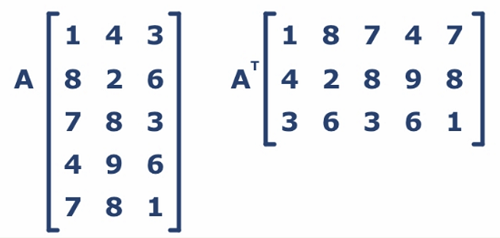

- torch.transpose(input, dim0, dim1) → Tensor

- torch.t

- tensor.T

In [19]:
x = torch.randn(2, 3)
x

tensor([[-0.5551, -1.4631,  0.3651],
        [ 1.3306, -0.7047, -0.0802]])

###  torch.transpose

- torch.transpose(input, dim0, dim1) → Tensor
> - input (Tensor) – the input tensor.
> - dim0 (int) – the first dimension to be transposed
> - dim1 (int) – the second dimension to be transposed

In [20]:
torch.transpose(x, 0, 1)

tensor([[-0.5551,  1.3306],
        [-1.4631, -0.7047],
        [ 0.3651, -0.0802]])

### torch.t

In [21]:
torch.t(x)

tensor([[-0.5551,  1.3306],
        [-1.4631, -0.7047],
        [ 0.3651, -0.0802]])

### tensor.T

In [22]:
x.T

tensor([[-0.5551,  1.3306],
        [-1.4631, -0.7047],
        [ 0.3651, -0.0802]])

### Back to fixing the error

In [23]:
print(tensor_A)
print(tensor_B)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[ 7., 10.],
        [ 8., 11.],
        [ 9., 12.]])


In [24]:
# View tensor_A and tensor_B.T
print(tensor_A)
print(tensor_B.T)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[ 7.,  8.,  9.],
        [10., 11., 12.]])


In [25]:
# The operation works when tensor_B is transposed
print(f"Original shapes: tensor_A = {tensor_A.shape}, tensor_B = {tensor_B.shape}\n")
print(f"New shapes: tensor_A = {tensor_A.shape} (same as above), tensor_B.T = {tensor_B.T.shape}\n")
print(f"Multiplying: {tensor_A.shape} * {tensor_B.T.shape} <- inner dimensions match\n")
print("Output:\n")
output = torch.matmul(tensor_A, tensor_B.T)
print(output) 
print(f"\nOutput shape: {output.shape}")

Original shapes: tensor_A = torch.Size([3, 2]), tensor_B = torch.Size([3, 2])

New shapes: tensor_A = torch.Size([3, 2]) (same as above), tensor_B.T = torch.Size([2, 3])

Multiplying: torch.Size([3, 2]) * torch.Size([2, 3]) <- inner dimensions match

Output:

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

Output shape: torch.Size([3, 3])


In [26]:
# torch.mm is a shortcut for matmul
torch.mm(tensor_A, tensor_B.T)

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

salam

![visual demo of matrix multiplication](https://github.com/aidinism/deep-learning/raw/main/images/03-matrix-multiply.gif)

You can create your own matrix multiplication visuals like this at http://matrixmultiplication.xyz/.

***Note: A matrix multiplication like this is also referred to as the dot product of two matrices.***